## 데이터 전처리

#### 정의
- 데이터 분석 성능 향상을 위해 데이터 수정하거나 형태를 변형하는 작업
- DATA PREPROCESSING

### 데이터 전처리 종류 - 아래 4가지는 전처리의 필수로 생각해야 함

- 데이터 크리닝 - 결측치, 틀린 값 처리
- 스케일링 : 여러 변수 (피처) 값의 범위를 동등한 조건으로 맞추는 것
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 : 문자를 인산형 수치로 변환(카테고리 인코딩), 로그변환(데이터의 분포가 치우쳤을 때, 금액과 관계되는 특성)

## 데이터 클리닝

###  결측치 처리
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시된다: not a number)
- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
###  틀린값 처리
- 틀린값을 처리하는 방법도 결측치를 처리하는 방법과 같이 세가지이다
 - 틀린 값이 포함된 샘플(행)을 버린다
 - 틀린 값을 적절한 값으로 대체한다
 - 틀린값 처리를 다음 분석 단계로 넘긴다. 즉, 틀린값을 그대로 둔다


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# matplotlib를 이용하여 다양한 시각화 함수를 제공하는 라이브러리 seaborn
import seaborn as sns

### 난수 생성 (참고)

In [60]:
np.random.randint(10) # 0 부터 9까지 램덤 값
np.random.randint(5, 10) # 5 부터 9까지 램덤 값
np.random.randint(7, 10, size=5) # 7 부터 9까지 램덤 값 5개

9

7

array([9, 9, 7, 9, 8])

In [53]:
np.random.randn(5) # 0부터 1까지 난수 5개
np.random.randn(5).round(2) # 0부터 1까지 난수 5개 소수 둘째자리
np.random.randn(3,2).round(2)

array([-1.28058300e+00,  4.75731549e-02, -8.32416467e-01, -1.03538706e+00,
        7.09518565e-04])

array([-1.81,  0.54,  0.14, -0.71, -0.02])

array([[ 0.22, -0.35],
       [ 0.53,  1.32],
       [-0.75,  0.71]])

### 실습 데이터
- 키와 몸무게 데이터 생성
- 평균 170CM, 65KG, 표준편차 4CM, 5KG

In [61]:
4*np.random.randn(10).round(2)

array([ 5.  , -2.76,  2.88,  0.36,  7.88,  2.4 , -3.76,  0.2 ,  0.28,
       -4.12])

In [62]:
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 4*np.random.randn(n_samples).round(2) + 65

df_raw = pd.DataFrame({'height' : height, 
                       'weight' : weight})

df_raw[:5]

,height,weight
0,173.20,66.12
1,170.60,67.68
2,177.12,73.44
3,171.52,67.48
4,171.96,63.20


In [64]:
# 원본보관
df = df_raw.copy()

<AxesSubplot:ylabel='Count'>

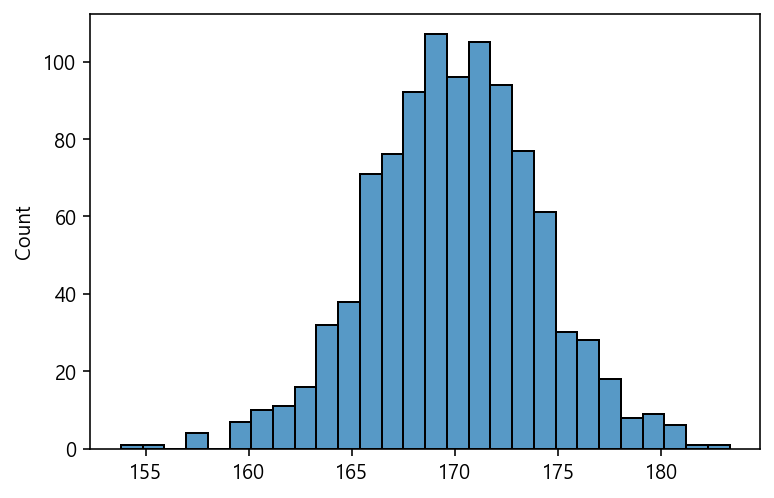

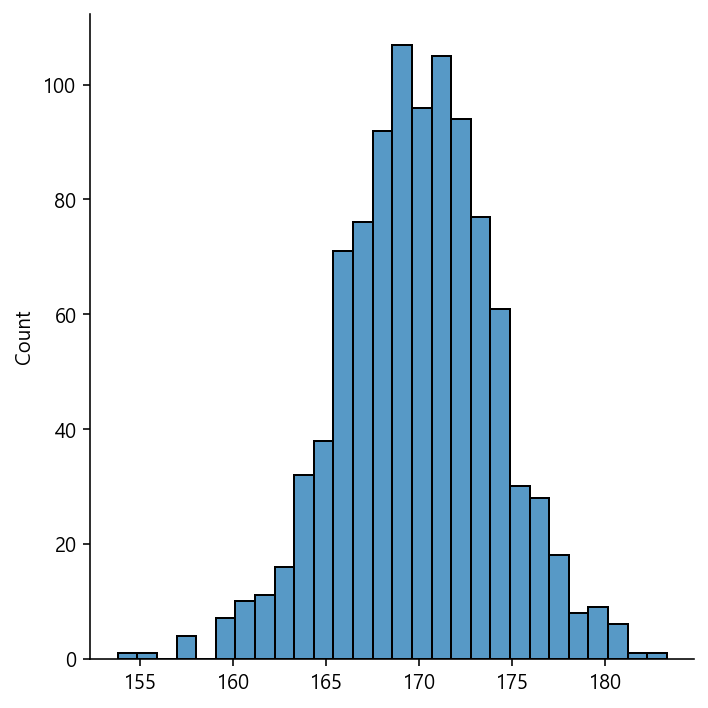

In [6]:
# 데이터 분포 확인 (확률 분포 근사 그래프 그리기)
sns.histplot(df.height.values)
sns.displot(df.height.values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

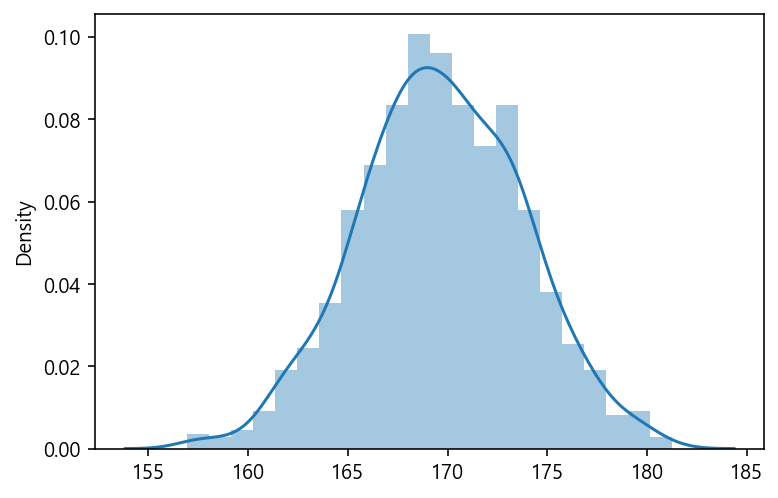

In [67]:
sns.distplot(df.height.values)

<AxesSubplot:ylabel='Count'>

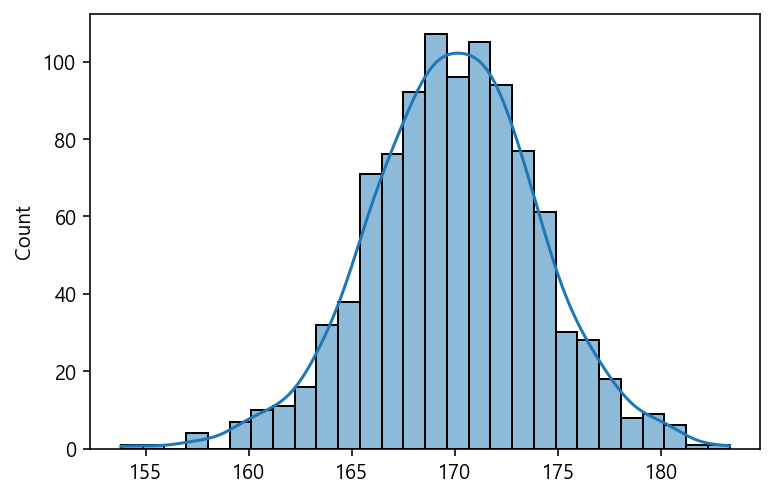

In [8]:
sns.histplot(df.height.values, kde=True)

### 결측치 처리 실슴
- 결측치 확인 : np.isnull() 사용
- 결측치 치환 : np.fillna() 사용

In [73]:
# 임의 값 하나를 결측치로 변경
df['weight'][2] = np.nan
df[:5]

,height,weight
0,173.20,66.12
1,170.60,67.68
2,177.12,NaN
3,171.52,67.48
4,171.96,63.20


In [74]:
# 컬럼별 결측치 갯수 보기
df.isnull().sum()

height    0
weight    1
dtype: int64

In [75]:
# 결측치가 있는 행(샘플, 레코드) 삭제하기 (df.dropna())
# 데이터가 충분해야 함 : 1000개 중 1개의 레코드에 결측치가 있으므로 삭제 가능
df2 = df.dropna()
df2.shape
df2[:5]

(999, 2)

,height,weight
0,173.20,66.12
1,170.60,67.68
3,171.52,67.48
4,171.96,63.20
5,168.88,63.36


In [76]:
# 결측치를 다른 값으로 대체하기
# 키와 몸무게는 평균치로 대체하는 것이 일반적

df3 = df.fillna(df['weight'].mean())
df3[:5]

,height,weight
0,173.20,66.120000
1,170.60,67.680000
2,177.12,65.177417
3,171.52,67.480000
4,171.96,63.200000


In [77]:
# 결측치 0으로 대체하는 경우
# 키나 몸무게는 함부로 0으로 대체하면 안됨
df.fillna(0)[:5]

,height,weight
0,173.20,66.12
1,170.60,67.68
2,177.12,0.00
3,171.52,67.48
4,171.96,63.20


In [78]:
# 결측치를 바로 이전/이후 값으로 대체할 수 있음
# 키나 몸무게 같은 데이터가 아닌 날씨와 관련된 시계열 데이터인 경우 많이 사용
# ffill(결측 이전 데이터) / bbfill(결측치 이후 데이터)
# 사용법 fillna(method='ffill')

df.fillna(method='ffill')[:5]

,height,weight
0,173.20,66.12
1,170.60,67.68
2,177.12,67.68
3,171.52,67.48
4,171.96,63.20


# 스케일링
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 한다 (예: 과목 성적 100점 만점으로 환산)
- 표준 스케일링을 가장 많이 사용한다 (평균이 0, 표준편차가 1이 되도록 변환) 
    - 표준 스케일링을 했다고 데이터 분포가 정규분포가 되지는 않는다. 데이터 분포의 형태는 그대로 유지하되 평균을 0 표준편차를 1로 환산하는 것 뿐이지 데이터의 shape을 변경시키지는 않으므로 정규분포화라고 표현하면 안됨
    - 과목간 편차가 있는경우 데이터가 외곡되므로 평균과 표준편차를 동일하게 환산
    - 국어의 평균은 90점에 모여있고 수학은 70점에 모여 있다면 그 두 과목을 그냥 처리하면 외곡됨
    - 수학은 편차가 크고 국어는 편차가 없으면 수학이 모든걸 좌우하는데 국어도 똑같은 비중으로 반영하게 하려면 퍼진정도를 맞춰줘야함
- 값의 최소치와 최대치가 정해진 경우는 min-max 스케링일도 자주 사용된다 (최소치를 0으로, 최대치를 1로)
    - 전압이 0-5 만 나온다면 min-max를 사용하기도 함

## 표준 스케일링


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-05%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.52.14.png?raw=1" width=140  align='left'>


In [79]:
# 키, 몸무게 데이터를 각각 표준 스케일링한 후 컬럼에 추가
# fit_transform () : 표준 스케일링을 구성해주는 함수
# 데이터프레임의 키와 몸무게 두 컬럼을 가지고 평균과 표준편차를 구하고 모든 데이터마다 평균을 빼서 표준편차로 나눠주는 작업을 수행
df = df_raw.copy() # 백업 데이터 사용 (결측치 없는)


In [80]:
from sklearn.preprocessing import StandardScaler #표준 스케일링

In [81]:
scale = StandardScaler() # 생성자 호출

In [82]:
df[['h_sc','w_sc']] = scale.fit_transform(df[['height', 'weight']])
df[:5]

,height,weight,h_sc,w_sc
0,173.20,66.12,0.851970,0.235052
1,170.60,67.68,0.222438,0.627511
2,177.12,73.44,1.801112,2.076588
3,171.52,67.48,0.445196,0.577196
4,171.96,63.20,0.551732,-0.499549


In [83]:
# scale 평균, scale의 표준편차
df['h_sc'].mean()
df['h_sc'].std()


1.1879386363489176e-16

1.000500375312774

### 데이터 분포 보기

<AxesSubplot:ylabel='Density'>

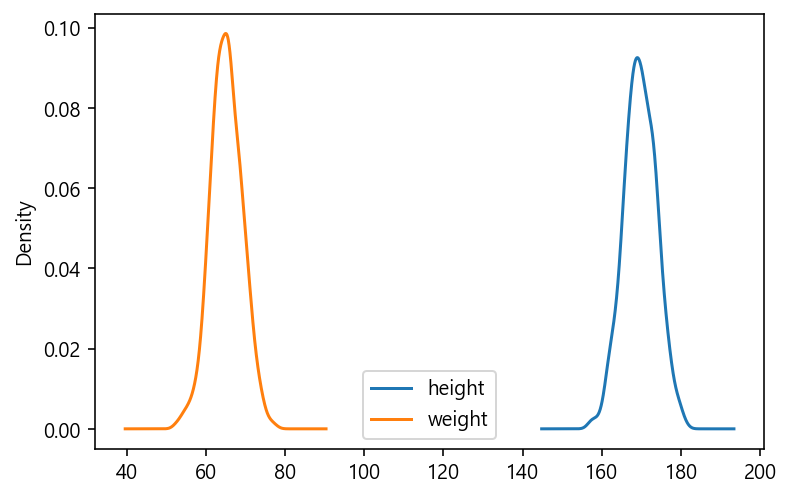

In [84]:
# 원래 키, 몸무게의 데이터의 확률 분포 보기 (kernel density estimate 함수 사용)
df[["height","weight"]].plot.kde() #히스토그램에 가장 근접한 확률분포함수를 이용한 그래프

<AxesSubplot:ylabel='Density'>

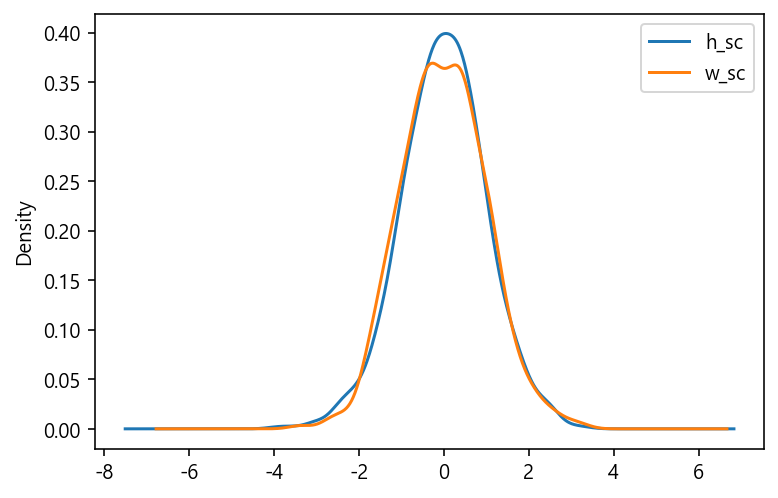

In [22]:
# 표준 스케일링된 데이터의 확률 분포 보기 - 정규분포로 생성했다
df[["h_sc","w_sc"]].plot.kde() #데이터의 평균이 1이고 표준편차가 0인 형태로 변환
# 키와 몸무게를 동일한 비중으로 사용하려면 값의 편차가 있으면 안된다


## Min-Max 스케일링
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정


In [85]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['h_mima','w_mima']]=minmax.fit_transform(df[['height','weight']]) #0과 1사이의 값으로 치환
df[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima
0,173.20,66.12,0.851970,0.235052,0.668863,0.544164
1,170.60,67.68,0.222438,0.627511,0.561779,0.605678
2,177.12,73.44,1.801112,2.076588,0.830313,0.832808
3,171.52,67.48,0.445196,0.577196,0.599671,0.597792
4,171.96,63.20,0.551732,-0.499549,0.617792,0.429022


<AxesSubplot:ylabel='Density'>

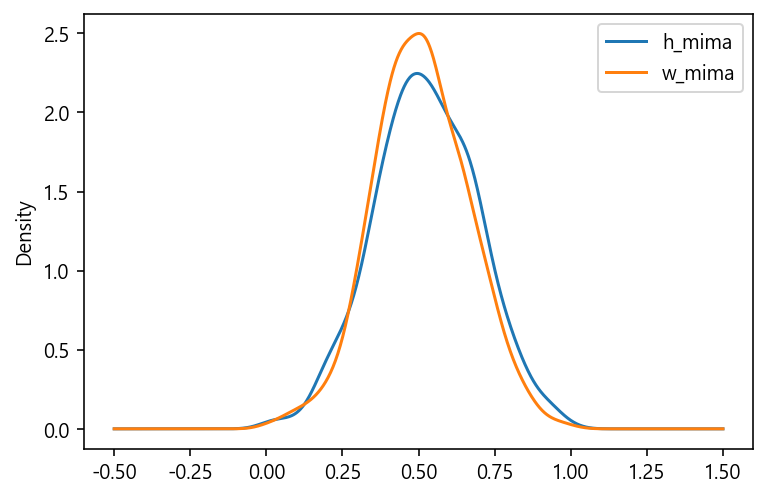

In [86]:
# min-max 스케일링 된 데이터의 확률 분포
df[["h_mima","w_mima"]].plot.kde()

# 0보다 적은 값이나 1보다 큰 값이 있어서 꼬리가 표현된 건 아님

- 위의 결과를 보면 표준 스케일링과 min-max 스케일링 별 차이가 없음
- 이상치가 있을 때는 두 스케일링 결과값의 변화 정도가 크게 달라짐

In [87]:
# 이상치가 포함된 키 데이터 생성: height_1
# 첫번째 샘플의 키 값을 임의로 2m로 변경 (200)
height_1 = height.copy()
height_1[0] = 200

In [89]:
df["height_1"] = height_1
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,173.20,66.12,0.851970,0.235052,0.668863,0.544164,200.00
1,170.60,67.68,0.222438,0.627511,0.561779,0.605678,170.60
2,177.12,73.44,1.801112,2.076588,0.830313,0.832808,177.12


In [90]:
# 이상치가 포함된 데이터(컬럼)을 표준 스케일링을 적용
df['h_1_sc'] = scale.fit_transform(df[['height_1']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc
0,173.20,66.12,0.851970,0.235052,0.668863,0.544164,200.00,7.147128
1,170.60,67.68,0.222438,0.627511,0.561779,0.605678,170.60,0.210432
2,177.12,73.44,1.801112,2.076588,0.830313,0.832808,177.12,1.748774


<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

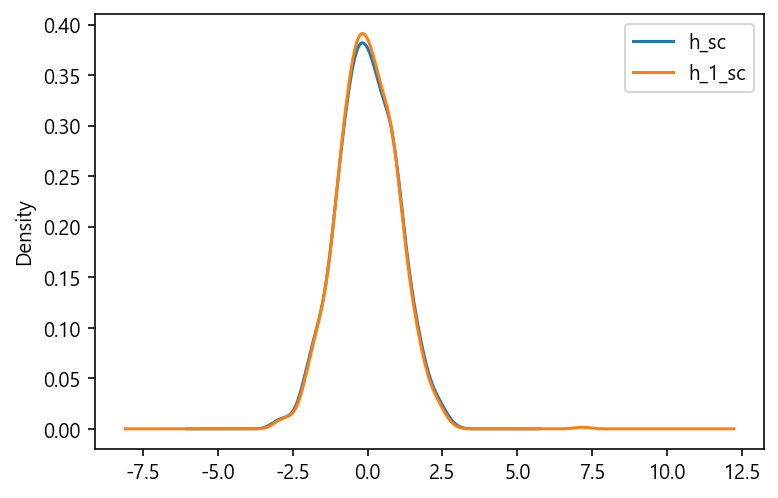

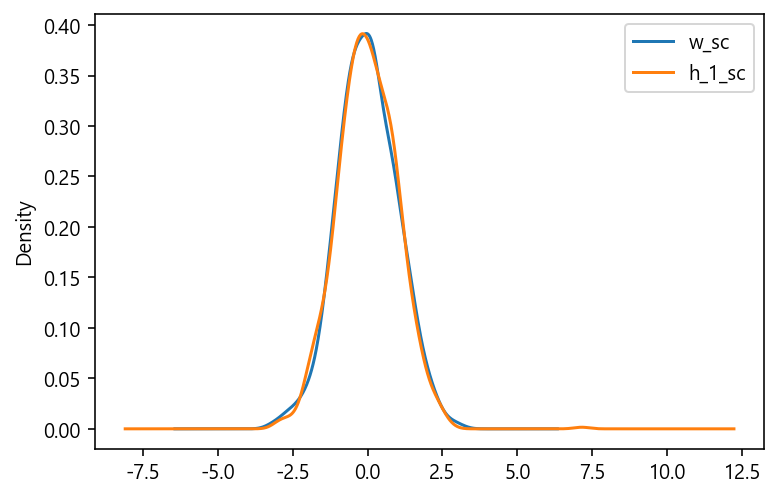

In [91]:
# 이상치가 있더라도 표준 스케일링의 분포는 변화가 거의 없음
# 한 두개의 이상치로 인해 전체 평균과 표준편차는 거의 변화지 않음
df[['h_sc','h_1_sc']].plot.kde()
df[['w_sc','h_1_sc']].plot.kde()

In [92]:
# 이상치가 있는 데이터에  min-max 스케일링을 적용
df['h_1_mima']=minmax.fit_transform(df[['height_1']])
df[:3] # 2m가 1이 되므로 나머지는 상대적으로 작아짐


,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima
0,173.20,66.12,0.851970,0.235052,0.668863,0.544164,200.00,7.147128,1.000000
1,170.60,67.68,0.222438,0.627511,0.561779,0.605678,170.60,0.210432,0.316914
2,177.12,73.44,1.801112,2.076588,0.830313,0.832808,177.12,1.748774,0.468401


<AxesSubplot:ylabel='Density'>

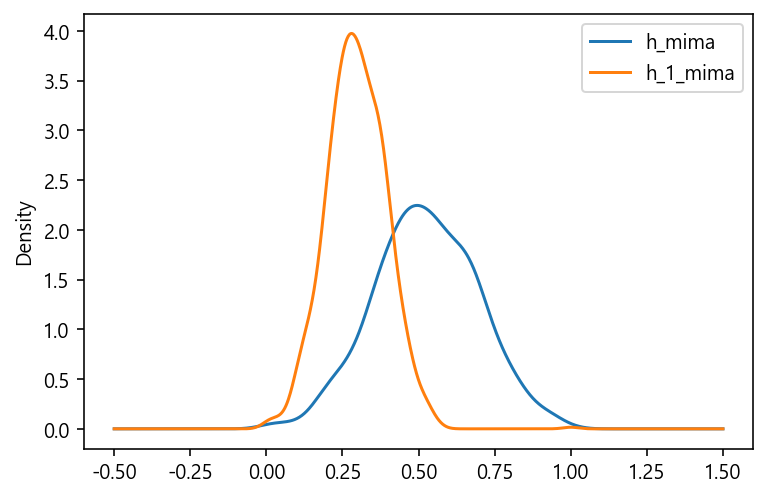

In [93]:
df[['h_mima','h_1_mima']].plot.kde()

# 정상값과 이상치포함값의 분포를 확인해보면 결과가 많이 달라짐 - 데이터분석시 입력값이 모두 달라진듯한 효과를 보인다
# 이상치가 들어오면 min_max인 경우에는 값이 달라질 수 있다는 것을 각오 하고 써야하며 
# 범위가 일정하다라는것이 명확하다면 편리하게 사용 가능

### 이상치 처리
- 경험이 필요함
- 이상치 처리의 목적은 두가지 이다
 - 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우
 - 2) 이상치를 찾는 것 자체가 목적인 경우 (outlier detection)
     - 신용카드 사용 시 특이한 구매를 찾는경우
     - 기기 이상을 찾는 경우
 
- 아래는 모두 같은 상관계수를 같는 데이터 셋이다
    - 그러나 성격은 다르다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=400 align='left'>


## 이상치 탐지
 - boxplot()을 보면 이상치 존재를 파악하기 쉽다
 - 표준 스케일링 한 후 값이 큰 것들 (예 6 이상)을 찾는 방법이 일반적이다


<AxesSubplot:>

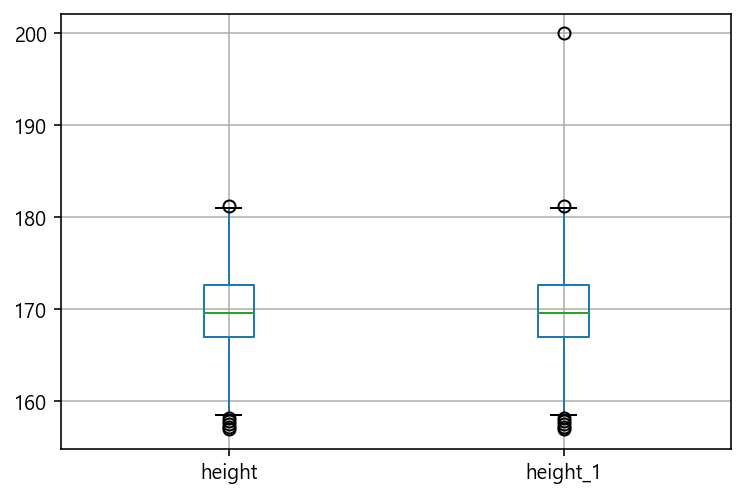

In [94]:
df[["height", "height_1"]].boxplot()

<AxesSubplot:>

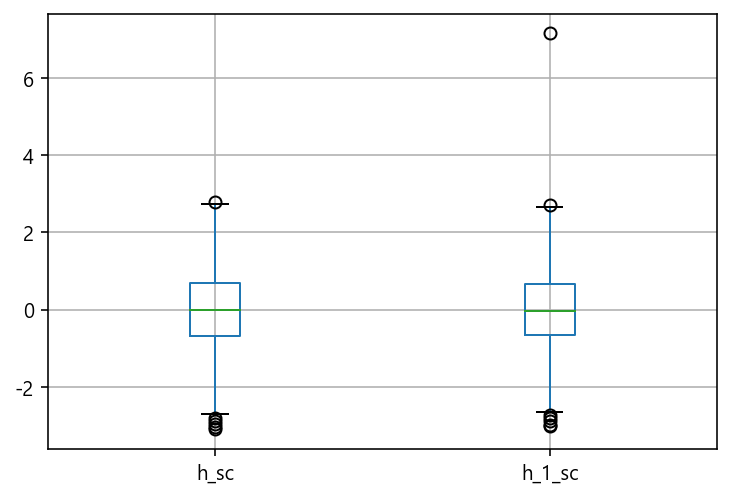

In [95]:
df[["h_sc", "h_1_sc"]].boxplot() # 키 2m인 사람은 7 시그만 밖에 존재

## 데이터 변환
### 로그 변환

- 어떤 변수는 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우가 있다
- 예: 돈(수입/지출), 생물학적 자극과 반응 관계 (청각, 미각, 후각, 압력 등) 
- 소리가 작을 때는 조금만 커져도 변화를 느끼지만 소리가 큰 경우는 많이 커져야 변화를 느낄 수 있다
- 데이터 분석에서는 입출력 관계가 선형적일 때 가장 잘 예측할 수 있다 (선형적일수록 예측이 잘 된다)


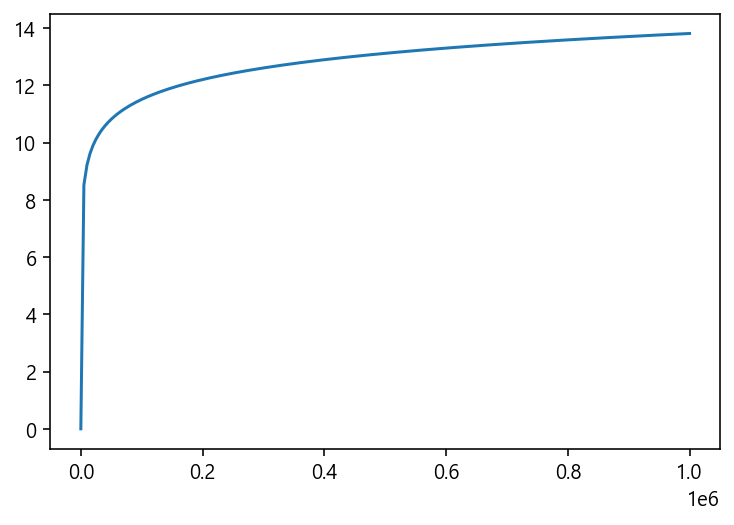

In [96]:
x = np.linspace(1, 1000000, 200)
y = np.log(x)

plt.plot(x,y)

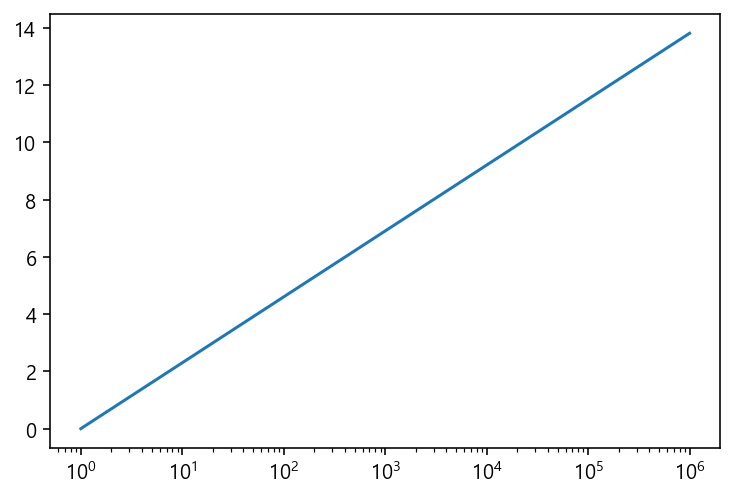

In [97]:
# x값에 로그를 취하면 x와 y의 관계가 선형적이 됨

plt.xscale('log')
plt.plot(x,y)